In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
plt.style.use('seaborn')

In [2]:
data = pd.DataFrame()
data['year'] = range(1976, 1986)
data['passenger_deaths'] = [734, 516, 754, 877, 814, 362, 764, 809, 223, 1066]
data['miles_flown'] = [3863.2, 4300, 5026.7, 5481.2, 5814.3, 6033.3, 5876.9, 6223.1, 7433.3, 7106.7]


In [3]:
data.describe()

,year,passenger_deaths,miles_flown
count,10.00000,10.000000,10.000000
mean,1980.50000,691.900000,5715.870000
std,3.02765,252.389228,1117.772407
min,1976.00000,223.000000,3863.200000
25%,1978.25000,570.500000,5140.325000
50%,1980.50000,759.000000,5845.600000
75%,1982.75000,812.750000,6175.650000
max,1985.00000,1066.000000,7433.300000


## Modeling

We will give our data a likelihood function of a poisson model. This model is based on the fact that we can assocciate deaths with a certain rate. This rate we can relate to the miles flown, creating an exposure poisson or a poisson regression.

In this likelihood model we use a gamma conjugate prior

In [4]:
k_prior = 2
t_prior = 10

k_post = k_prior + data['passenger_deaths'].sum()
t_post = t_prior + data['miles_flown'].sum()

prior = stats.gamma(k_prior, scale=t_prior)
post = stats.gamma(k_post, scale=t_post)

6921 57168.7


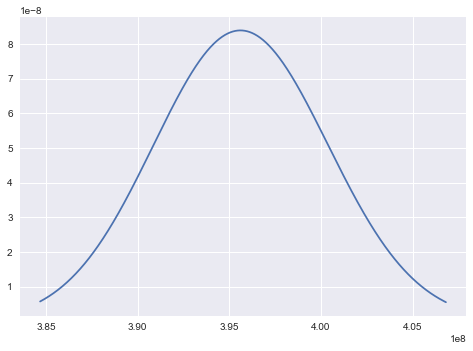

In [5]:
x_prior = np.linspace(*prior.ppf([0.01, 0.99]), 1000)
x_post = np.linspace(*post.ppf([0.01, 0.99]), 1000)

# plt.plot(x_prior, prior.pdf(x_prior))
plt.plot(x_post, post.pdf(x_post))
print(k_post, t_post)

In [6]:
# plt.hist(data['passenger_deaths'], density=True, alpha=.5)
samples = stats.nbinom.rvs(data['miles_flown'], 1/(1+t_post), size=1000)
# samples = post_pred.rvs(size=1000)
plt.hist(samples, alpha=0.5, density=True);

ValueError: size does not match the broadcast shape of the parameters.